## House Prices with Random forests

In [99]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:
PATH = "data\\house-prices\\"

In [101]:
from ml_helpers.imports import *
from ml_helpers.df import *
from ml_helpers.engineering import *
from ml_helpers.manipulation import *
from ml_helpers.visualization import *
from ml_helpers.rf import *

In [102]:
df_raw = pd.read_csv(f'{PATH}train.csv', low_memory=False, index_col='Id')

In [103]:
display_all(df_raw.describe(include='all'))

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,

In [104]:
len(df_raw.columns)

80

### What metric to use?
Kaggle tells us what metric to use: RMSLE (root mean squared log error) between the actual and predicted auction prices. Therefore we take the log of the prices, so that RMSE will give us what we need.
- also figure out what is the name of dependent variable: SalePrice
- we need to transform SalePrice to log scale

In [105]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

### Fitting the RF model
Sklearn's random forest can only work with numerical values. We need to do some feature engineering:
- transform strings to categorical variables (- should they be ordinal?)
- deal with NaNs - fill with mean value, introduce boolean _na column

In [106]:
to_categorical(df_raw)
numericalize_all(df_raw)

In [107]:
len(df_raw.columns)

80

In [108]:
df_raw

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,4,65.0,8450,2,0,4,4,1,5,...,0,0,0,0,0,2,2008,9,5,12.247694
2,20,4,80.0,9600,2,0,4,4,1,3,...,0,0,0,0,0,5,2007,9,5,12.109011
3,60,4,68.0,11250,2,0,1,4,1,5,...,0,0,0,0,0,9,2008,9,5,12.317167
4,70,4,60.0,9550,2,0,1,4,1,1,...,0,0,0,0,0,2,2006,9,1,11.849398
5,60,4,84.0,14260,2,0,1,4,1,3,...,0,0,0,0,0,12,2008,9,5,12.429216
6,50,4,85.0,14115,2,0,1,4,1,5,...,0,0,3,3,700,10,2009,9,5,11.870600
7,20,4,75.0,10084,2,0,4,4,1,5,...,0,0,0,0,0,8,2007,9,5,12.634603
8,60,4,NaN,10382,2,0,1,4,1,1,...,0,0,0,3,350,11,2009,9,5,12.206073
9,50,5,51.0,6120,2,0,4,4,1,5,...,0,0,0,0,0,4,2008,9,1,11.774520


Display missing columns

In [109]:
display_all((df_raw.isnull().sum().sort_index()/len(df_raw)).sort_values(ascending=False))

LotFrontage      0.177397
GarageYrBlt      0.055479
MasVnrArea       0.005479
EnclosedPorch    0.000000
ExterQual        0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
Fence            0.000000
FireplaceQu      0.000000
Fireplaces       0.000000
Foundation       0.000000
FullBath         0.000000
Functional       0.000000
GarageArea       0.000000
GarageCars       0.000000
GarageCond       0.000000
GarageFinish     0.000000
GarageQual       0.000000
GarageType       0.000000
ExterCond        0.000000
YrSold           0.000000
GrLivArea        0.000000
Condition2       0.000000
2ndFlrSF         0.000000
3SsnPorch        0.000000
Alley            0.000000
BedroomAbvGr     0.000000
BldgType         0.000000
BsmtCond         0.000000
BsmtExposure     0.000000
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtFinType1     0.000000
BsmtFinType2     0.000000
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
BsmtQual         0.000000
BsmtUnfSF        0.000000
CentralAir  

In [110]:
fill_all_missing(df_raw)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
Id,,,,,,,,,,,,,,,,,,,,,
1,60,4,65.0,8450,2,0,4,4,1,5,...,0,0,2,2008,9,5,12.247694,False,False,False
2,20,4,80.0,9600,2,0,4,4,1,3,...,0,0,5,2007,9,5,12.109011,False,False,False
3,60,4,68.0,11250,2,0,1,4,1,5,...,0,0,9,2008,9,5,12.317167,False,False,False
4,70,4,60.0,9550,2,0,1,4,1,1,...,0,0,2,2006,9,1,11.849398,False,False,False
5,60,4,84.0,14260,2,0,1,4,1,3,...,0,0,12,2008,9,5,12.429216,False,False,False
6,50,4,85.0,14115,2,0,1,4,1,5,...,3,700,10,2009,9,5,11.870600,False,False,False
7,20,4,75.0,10084,2,0,4,4,1,5,...,0,0,8,2007,9,5,12.634603,False,False,False
8,60,4,69.0,10382,2,0,1,4,1,1,...,3,350,11,2009,9,5,12.206073,True,False,False
9,50,5,51.0,6120,2,0,4,4,1,5,...,0,0,4,2008,9,1,11.774520,False,False,False


In [111]:
y = df_raw.SalePrice
df_raw.drop('SalePrice', axis=1, inplace=True)

Get percentage of missing values per column

In [112]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
m = RandomForestRegressor(n_jobs=-1)
m.fit(df_raw, y)
m.score(df_raw, y)

C:\Users\terez\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9725032267778504

RandomForestRegressor's .score() returns r^2 - how much variance of the training set was explained by the model. Am i doing good? Only one way to find out - introduce validation dataset

Note: Data is not shuffled on purpose - this dataset has a time element = the test set provided by kaggle has all dates later (we're trying to predict prices in the future) - we want to kind of replicate this with our validation dataset, so randomly shuffling it would make it easier and will lead to inaccurate predictions.

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(df_raw, y, test_size=0.1, random_state=42)
X_train.shape, X_valid.shape

((1314, 82), (146, 82))

In [114]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
          m.score(X_train, y_train), m.score(X_valid, y_valid)]
    return res

m = RandomForestRegressor(n_jobs=-1, oob_score=True)
%time m.fit(df_raw, y)
print(f"{m.oob_score_}")
print_score(m)

C:\Users\terez\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\terez\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Wall time: 232 ms
-8.55978154060261


[0.06602786880870433,
 0.05947483968585868,
 0.9719415947181814,
 0.9819502077173834]

Get a better understanding about what's going on using just a single tree

In [115]:
tree = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
%time tree.fit(X_train, y_train)
print_score(tree)

Wall time: 110 ms


[0.21431854656247673,
 0.22196626287452687,
 0.7043840006398784,
 0.748591713253451]

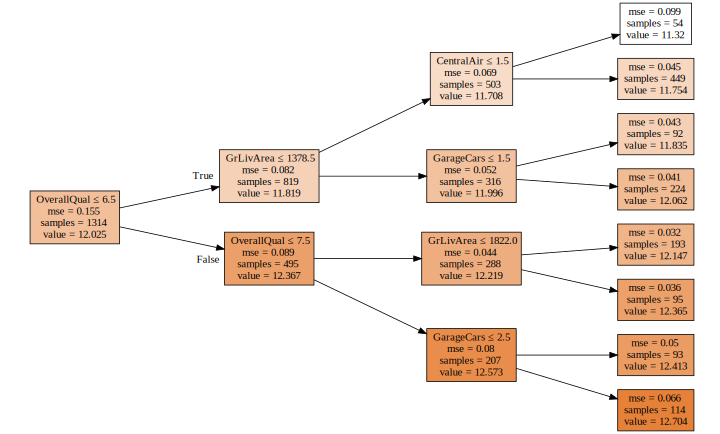

In [116]:
draw_tree(tree.estimators_[0], X_train, precision=3)

#### Validation without validation set - OOB (Out-of-bag) score
Not all the rows are used in training a specific tree. Idea: How each row, calculate its error on a tree that didn't use that row in training.

In [117]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print(f"{m.oob_score_}")
print_score(m)

Wall time: 355 ms
0.853262015061657


[0.056542784270631585,
 0.12958338701475577,
 0.9794239121806124,
 0.9143150983242856]

In [118]:
set_rf_samples(20000)
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 592 ms


[2.0570534317919053e-05,
 0.12849826677971382,
 0.9999999972766745,
 0.9157441260120958]

In [119]:
m = RandomForestRegressor(n_estimators=50, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), np.array(y_valid)[0]

Wall time: 724 ms


C:\Users\terez\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


(array([11.88793137, 11.91772368, 11.9283409 , 11.94470788, 11.90496755,
        11.85651517, 11.86446223, 11.86709728, 11.94470788, 11.87756858,
        11.82041016, 11.94470788, 11.84510278, 11.94470788, 11.94470788,
        11.91772368, 11.82407989, 11.94470788, 11.91772368, 11.59910316,
        11.8386256 , 11.91772368, 11.84222921, 11.84222921, 11.68266824,
        11.97350987, 11.94470788, 11.79244935, 11.88793137, 11.84510278,
        11.89818787, 11.75978554, 11.91170158, 11.95761129, 11.94470788,
        11.8386256 , 11.90496755, 11.82041016, 11.92503512, 11.91772368,
        11.81303006, 11.34450681, 11.8386256 , 11.8386256 , 11.84222921,
        11.88793137, 11.84510278, 11.75978554, 11.9283409 , 11.82041016]),
 11.861230378919151,
 11.947949375319936)

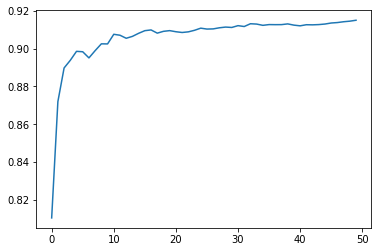

In [120]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(50)]);

### Hyperparameter optimization
- min_samples_leaf=3 - stop training the tree when my leaf node has 3 or less samples in them
- max_features=0.5 - the less correlated trees, the better. At every single split point, take different columns. This number specifies the proportion of features randomly selected for each split

In [121]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print(f"{m.oob_score_}")
print_score(m)

C:\Users\terez\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Wall time: 268 ms
-930.6824124690708


[0.040762518640273186,
 0.1345524561265032,
 0.9893062396953327,
 0.9076176707757123]

In [122]:
m = RandomForestRegressor(n_estimators=20, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print(f"{m.oob_score_}")
print_score(m)

C:\Users\terez\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Wall time: 141 ms
-930.6824124690708


[0.04289836278770747, 0.13078110480968, 0.9881562328658835, 0.912723835540296]

In [123]:
m = RandomForestRegressor(n_estimators=20, max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print(f"{m.oob_score_}")
print_score(m)

C:\Users\terez\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Wall time: 267 ms
-930.6824124690708


[1.3300853168971875e-05,
 0.1250729898955972,
 0.9999999988614099,
 0.9201761423726886]

In [124]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print(f"{m.oob_score_}")
print_score(m)

C:\Users\terez\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Wall time: 390 ms
-930.6824124690708


[1.792813029322795e-05,
 0.1293472787959668,
 0.999999997931391,
 0.9146270592793114]

In [143]:
df_train = pd.read_csv(f'{PATH}train.csv', low_memory=False, index_col='Id')
df_test = pd.read_csv(f'{PATH}test.csv', low_memory=False, index_col='Id')
y = df_train.SalePrice
df_train = df_train.drop('SalePrice', axis=1)

In [144]:
df_train['training_set'] = True
df_test['training_set'] = False
df_full = pd.concat([df_train, df_test])
to_categorical(df_full)
numericalize_all(df_full)
fill_all_missing(df_full)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MasVnrArea_na,BsmtFinSF1_na,BsmtFinSF2_na,BsmtUnfSF_na,TotalBsmtSF_na,BsmtFullBath_na,BsmtHalfBath_na,GarageYrBlt_na,GarageCars_na,GarageArea_na
Id,,,,,,,,,,,,,,,,,,,,,
1,60,4,65.0,8450,2,0,4,4,1,5,...,False,False,False,False,False,False,False,False,False,False
2,20,4,80.0,9600,2,0,4,4,1,3,...,False,False,False,False,False,False,False,False,False,False
3,60,4,68.0,11250,2,0,1,4,1,5,...,False,False,False,False,False,False,False,False,False,False
4,70,4,60.0,9550,2,0,1,4,1,1,...,False,False,False,False,False,False,False,False,False,False
5,60,4,84.0,14260,2,0,1,4,1,3,...,False,False,False,False,False,False,False,False,False,False
6,50,4,85.0,14115,2,0,1,4,1,5,...,False,False,False,False,False,False,False,False,False,False
7,20,4,75.0,10084,2,0,4,4,1,5,...,False,False,False,False,False,False,False,False,False,False
8,60,4,68.0,10382,2,0,1,4,1,1,...,False,False,False,False,False,False,False,False,False,False
9,50,5,51.0,6120,2,0,4,4,1,5,...,False,False,False,False,False,False,False,False,False,False


In [145]:
df_train = df_full[df_full['training_set']==True]
df_train = df_train.drop('training_set', axis=1)
df_test = df_full[df_full['training_set']==False]
df_test = df_test.drop('training_set', axis=1)

In [147]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1, oob_score=True)
%time m.fit(df_train, y)
print(f"{m.oob_score_}")

Wall time: 345 ms
-5.190039063375957


C:\Users\terez\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [148]:
preds = m.predict(df_test)
my_submission = pd.DataFrame({'Id': df_test.index, 'SalePrice': preds})
my_submission.to_csv(f'{PATH}submission.csv', index=False)